In [28]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

In [29]:
# Import csv file into pandas dataframe
data = pd.read_csv("banknote_authentication_dataset.csv")
data

,V1,V2
0,3.62160,8.66610
1,4.54590,8.16740
2,3.86600,-2.63830
3,3.45660,9.52280
4,0.32924,-4.45520
...,...,...
1367,0.40614,1.34920
1368,-1.38870,-4.87730
1369,-3.75030,-13.45860
1370,-3.56370,-8.38270


In [30]:
data.shape

(1372, 2)

In [31]:
# Check the number of non-null values in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
dtypes: float64(2)
memory usage: 21.6 KB


In [32]:
# Check Null values
data.isnull().sum()

V1    0
V2    0
dtype: int64

In [33]:
# Obtain the statistical summary of the dataframe
data.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


In [34]:
# Check the number of duplicated entries in the dataframe
data.duplicated().sum()

24

In [35]:
# Remove duplicates 
data.drop_duplicates(inplace=True)

In [36]:
# Ensure that the duplicates are removed.  
data.duplicated().sum()

0

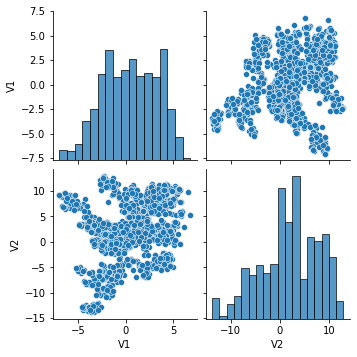

In [38]:
sns.pairplot(data)
plt.show()

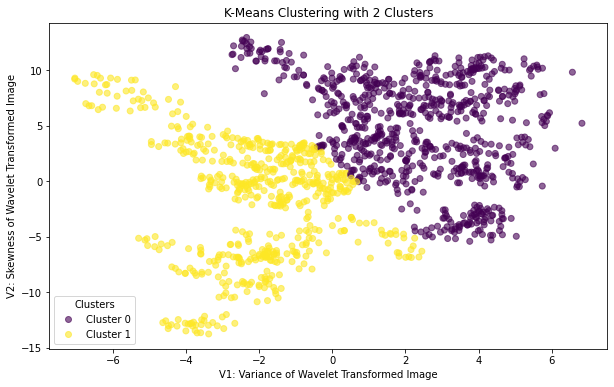

In [39]:
# Standardize the features (V1 and V2)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['V1', 'V2']])  # Specify the columns to scale

# Apply K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['V1'], data['V2'], c=data['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('V1:Image')
plt.ylabel('V2: Skewness of Wavelet Transformed Image')
plt.title('K-Means Clustering with 2 Clusters')

# Create a custom legend
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Cluster 0', 'Cluster 1'], title='Clusters')

plt.show()



In [55]:
# Notes identified by cluster
data

,V1,V2,Cluster
0,3.62160,8.66610,0
1,4.54590,8.16740,0
2,3.86600,-2.63830,0
3,3.45660,9.52280,0
4,0.32924,-4.45520,1
...,...,...,...
1367,0.40614,1.34920,0
1368,-1.38870,-4.87730,1
1369,-3.75030,-13.45860,1
1370,-3.56370,-8.38270,1


In [48]:
# Count the number of observations within each cluster 
cluster_count = data['Cluster'].value_counts()

print(cluster_count)


0    767
1    581
Name: Cluster, dtype: int64


In [49]:
# Calculate summary statistics for each feature grouped by cluster
summary_stats = data.groupby('Cluster').describe()

print(summary_stats)

            V1                                                                 \
         count      mean       std     min       25%     50%      75%     max   
Cluster                                                                         
0        767.0  2.340487  1.906797 -2.7419  0.935975  2.5367  3.88360  6.8248   
1        581.0 -2.055482  1.794082 -7.0421 -3.142300 -1.9116 -0.83535  2.4486   

            V2                                                                  
         count      mean       std      min     25%      50%      75%      max  
Cluster                                                                         
0        767.0  4.698130  4.562013  -5.4236  1.3088  5.28080  8.60715  12.9516  
1        581.0 -1.772944  5.350832 -13.7731 -6.3486 -0.53181  2.30720   9.6014  
